In [195]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [196]:
import numpy as np
import pandas as pd

In [197]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [198]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [199]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [200]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [201]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [202]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [203]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [204]:
#confirm the keys
Station.classes.keys()

['measurement', 'station']

In [205]:
#View the column names of the 'station' table in Station class
station_table_columns = session.query(Station).first()
station_table_columns.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10facd710>,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [206]:
#confirming the keys
Measurement.classes.keys()

['measurement', 'station']

In [207]:
#Viewing the column names of the 'measurement' table in Measurement class
measurement_table_columns = session.query(Measurement).first()
measurement_table_columns.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12238fe10>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [208]:
#Create an inspector and connect it to the engine, to see the tables
inspector = inspect(engine)

#Get the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [209]:
#1. Use `engine.execute` to select and display the first 25 rows from the table
engine.execute('SELECT * FROM Measurement LIMIT 25').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [210]:
# Find out the most recent date in the table
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [211]:
# Calculate the date 1 year ago from the last data point in the database
starting_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(starting_date)

2016-08-23


In [212]:
# Perform a query to retrieve the data and precipitation scores
percipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > starting_date).\
    order_by(Measurement.date).all()

In [213]:
# View the list of percipitation tuples
percipitation

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [214]:
# Save the query results as a Pandas DataFrame and ...
percipitation_df = pd.DataFrame(percipitation)
percipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [215]:
# ...set the index to the date column
percipitation_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [216]:
# Count the number of entries in the dataframe
percipitation_df.count()

date    2223
prcp    2015
dtype: int64

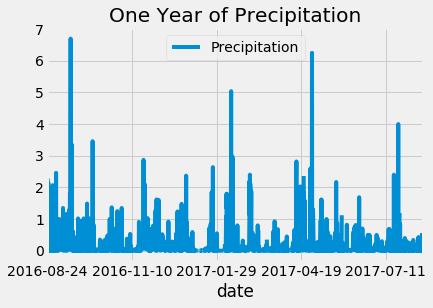

In [217]:
# Use Pandas Plotting with Matplotlib to plot the data
percipitation_df.plot('date', 'prcp')
plt.title("One Year of Precipitation")
plt.legend(["Precipitation"])
plt.savefig("Results/OneYearPercipitations.png")
plt.show()

In [ ]:
#################################################################################################################

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [218]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [219]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
locations

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [220]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [221]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = active_station[0][0]  
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [222]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and....
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > starting_date).\
    order_by(Measurement.date).all()
temp

[('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC00519281', '2016-09-18', 78.0),
 ('USC005192

In [223]:
#convert the list to dataframe
temp_df=pd.DataFrame(temp)
temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


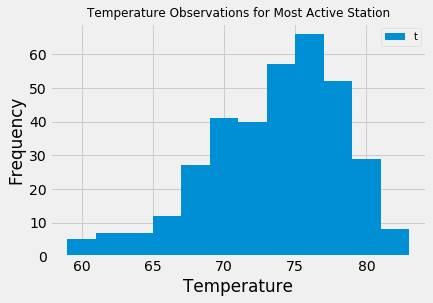

In [224]:
#plot the results as a histogram.
plt.hist(temp_df['tobs'],12)
plt.title("Temperature Observations for Most Active Station", fontsize=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs", bbox_to_anchor=(1,1), fontsize=10)
#plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("Results/MostActiveHistogram.png")
plt.show()

In [225]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [226]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# previous year is 2017, since there are no data for 2018
trip_temps = calc_temps('2017-02-28', '2017-03-05')
trip_temps

[(64.0, 72.02777777777777, 78.0)]

<IPython.core.display.Javascript object>


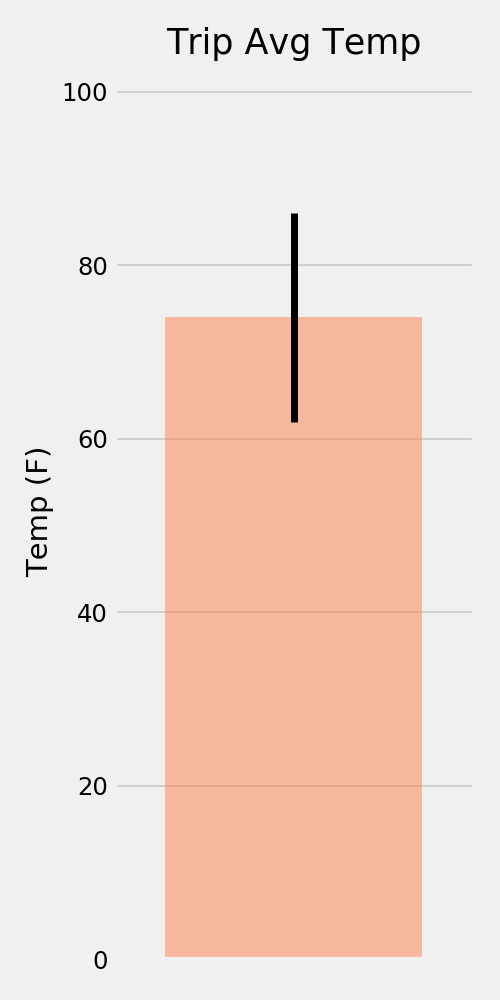

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


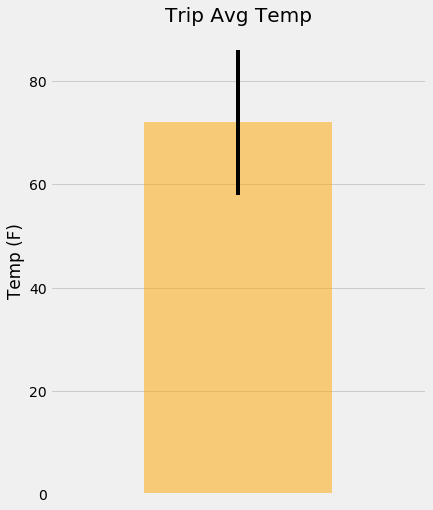

In [227]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temps_df = pd.DataFrame(trip_temps, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_temps_df['Avg Temp']
min_max_temp = trip_temps_df.iloc[0]['Max Temp'] - trip_temps_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='orange')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.savefig("Results/TripTempsSummary.png")
plt.show()

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [228]:
station_table_columns.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x10facd710>,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [229]:
measurement_table_columns.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12238fe10>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

In [230]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, 
# and elevation
sel = [Measurement.prcp, Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_station = session.query(*sel).filter(Measurement.station == Station.station).order_by(Measurement.prcp.desc())

for record in same_station:
    (m_prcp, m_station, s_name, s_lat, s_lon, s_elv) = record
    print(m_prcp, m_station, s_name, s_lat, s_lon, s_elv)

11.53 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
9.64 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8.81 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8.06 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
7.97 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
7.65 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
6.83 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
6.7 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
6.42 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
6.38 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
6.3 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
6.25 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
6.24 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
5.98 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
5.96 USC0051612

1.58 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
1.58 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.58 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.58 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.58 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.58 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.57 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
1.57 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.57 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
1.57 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.56 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
1.56 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.56 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.56 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.55 USC00513117 KANEOHE 838.1, HI US 21.

1.08 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
1.08 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
1.08 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.08 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.08 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.08 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.08 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
1.07 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
1.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
1.07 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
1.07 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
1.06 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.06 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
1.06 USC005161

0.83 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.83 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.82 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.82 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.82 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.82 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.82 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.82 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.82 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.82 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.82 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.82 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.81 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.81 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.81 USC00519523 WAIMANALO EXPER

0.69 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.69 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.69 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.69 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.69 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.69 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.68 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.68 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.68 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, 

0.53 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.53 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.53 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.53 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.53 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.53 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.53 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.999

0.42 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.42 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.42 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.42 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.42 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.42 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.42 USC00519281 WAIHEE 837.

0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.38 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.999

0.34 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.34 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.34 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4

0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.29 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.29 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.29 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.29 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0

0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.24 USC00514830 KUALOA RANCH HEADQUARTERS 8

0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.22 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.21 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.21 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.21 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.21 USC00513117 KANEOHE 838.1, HI US 21.4234 -1

0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.19 USC00516128 MAN

0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.16 U

0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.15 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.15 

0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.13 U

0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.11 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 

0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.1 USC00513117 KANEOHE 838.1, HI US 21.

0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.1 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.1 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.

0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.09 U

0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.08 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 

0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.07 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.07 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.07 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.07 USC00517948 PEARL CITY, HI US 21.3934 -15

0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.06 USC00513117 KANEOHE

0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.05 USC00519397 WAIKIKI 717.2, HI US 21

0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.05 USC00514830 KUALOA RANCH HEADQUARTERS 8

0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.05 USC00516128 MAN

0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.04 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 

0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.03 USC00519397 WAIKIKI 717.2, HI US 21

0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.03 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 

0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.03 U

0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.02 USC00519397 WAIKIKI 717.2, HI US 21

0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.02 USC00513117 KANEOHE

0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.02 U

0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.02 USC00516128 MAN

0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.01 USC00519397 WAIKIKI 717.2, HI US 21

0.01 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.01 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.01 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.01 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.01 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI U

0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.01 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5

0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.01 U

0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.01 USC00516128 MAN

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
0.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.

0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.

0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.

0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
0.0 USC00513117 KANEOHE 838.1, HI US 21.

0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0

0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0

0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
0.0 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0

0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
0.0 USC00517948 PEARL CITY, HI 

0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
0.0 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 3

0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519

0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519

0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519

0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
0.0 USC00519

0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIH

0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIH

0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIH

0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
0.0 USC00519281 WAIH

0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9

0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9

0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9

0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
0.0 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9

0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 78

0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
0.0 USC00516128 MANOA LYON ARBO 78

None USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
None USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
None USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
None USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
None USC00513117 KANEOHE 838

None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC005179

None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC005179

None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
None USC005179

None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
None USC00518838 UPPER WAHIAWA 874.3, HI US 21.4

None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
None USC00516128 MAN

## Optional Challenge Assignment

In [186]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("02-28")

[(65.0, 70.65517241379311, 80.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [194]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date


dates = ["02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
normals = [daily_normals(date) for date in dates]
normals

[[(65.0, 70.65517241379311, 80.0)],
 [(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)]]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


In [192]:
x = pd.DataFrame.from_records([{k: v for v, k in row} for row in normals])
x

ValueError: too many values to unpack (expected 2)

In [184]:
normals_df = pd.DataFrame(list(normals), columns = ["date","tmin","tavg","tmax"])
normals_df

AssertionError: 4 columns passed, passed data had 1 columns

In [ ]:
df_normals = pd.DataFrame(normals, index=dates, columns=["min", "avg", "max"])
df_normals

In [123]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, index=dates, columns=["date", "min", "avg", "max"])
normals_df

AssertionError: 4 columns passed, passed data had 1 columns

In [183]:
columns =['date', 'tmin', 'tavg', 'tmax']
pd.DataFrame(normals, columns=[['date'], ['tmin'], ['tavg'], ['tmax']])

AssertionError: 4 columns passed, passed data had 1 columns

<IPython.core.display.Javascript object>


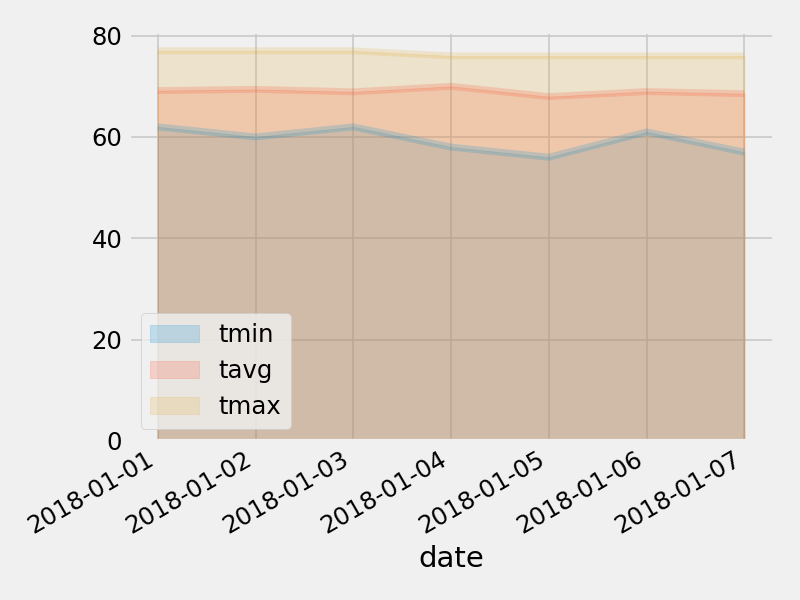

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
